In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('darkgrid')
%matplotlib inline

In [2]:

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


'TotalCharges' é um 'object' e deveria ser numérico.


In [4]:
# Convertendo para numérico, forçando erros a se tornarem NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:

# Verificando os NaNs criados
df.isnull().sum()



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

11 NaNs correspondem a clientes novos (tenure=0), então faz sentido preenchê-los com 0.

In [8]:

df.dropna(inplace=True)

# Análise da variável alvo (Churn)

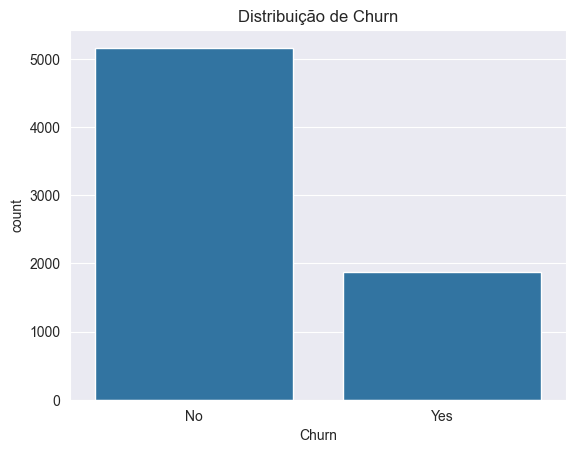

In [9]:

sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

É possível perceber um desbalanceamento entre as classes. Existem bem mais valores na classe "No" do que "Yes".

# Churn por tipo de contrato

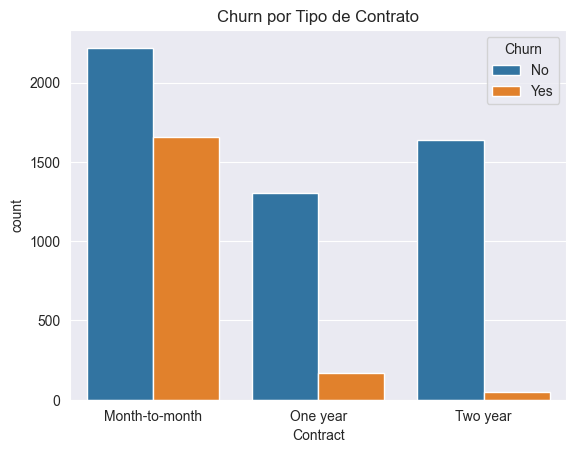

In [10]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.show()

clientes com contrato mensal têm uma taxa de churn muito maior.

# Churn por serviço de internet

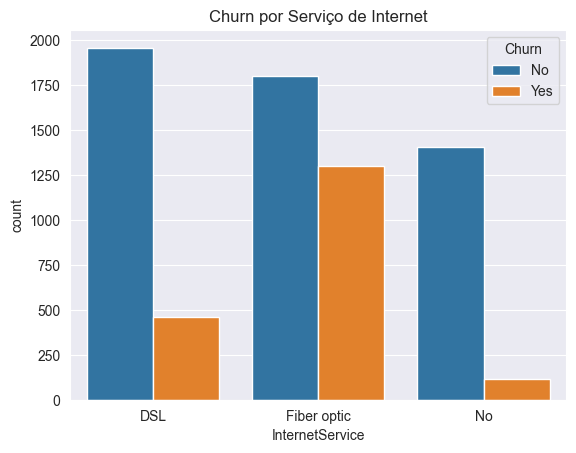

In [ ]:

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn por Serviço de Internet')
plt.show()

Clientes com fibra ótica têm mais churn. Talvez o serviço seja instável ou caro?

# Distribuição de Tenure (tempo de contrato)

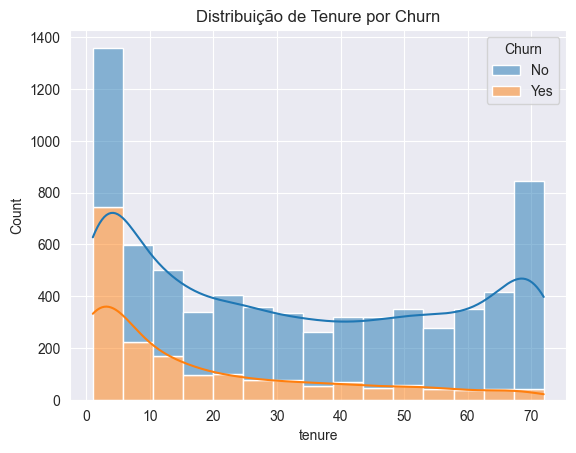

In [12]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribuição de Tenure por Churn')
plt.show()


# Conclusão: 

Clientes com pouco tempo de casa (baixo tenure) são os que mais cancelam.